# Exploratory data analysis

This notebook analyses the Fuel combustion data by visualizing the parameters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
'''
fig_params={'legend.fontsize':28,
          'axes.labelsize': 28,
          'axes.titlesize':32,
          'xtick.labelsize':24,
          'ytick.labelsize':24,             
          'axes.facecolor':'#D9DDD1'}
plt.rcParams.update(fig_params)
'''

%matplotlib inline

In [2]:
df=pd.read_csv('./data/Fuel_consumption_cleaned.csv')

In [3]:
df.head()

,MODEL_YEAR,MAKE,MODEL_engine,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,FUEL_CONSUMPTION_COMB_mpg,CO2_EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35.0,186.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37.0,175.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10.0,28.0,230.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25.0,264.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.0,7.0,8.6,33.0,198.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14253 entries, 0 to 14252
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MODEL_YEAR                 14253 non-null  int64  
 1   MAKE                       14253 non-null  object 
 2   MODEL_engine               14253 non-null  object 
 3   VEHICLE_CLASS              14253 non-null  object 
 4   ENGINE_SIZE                14253 non-null  float64
 5   CYLINDERS                  14253 non-null  float64
 6   TRANSMISSION               14253 non-null  object 
 7   FUEL_TYPE                  14253 non-null  object 
 8   FUEL_CONSUMPTION_CITY      14253 non-null  float64
 9   FUEL_CONSUMPTION_HWY       14253 non-null  float64
 10  FUEL_CONSUMPTION_COMB      14253 non-null  float64
 11  FUEL_CONSUMPTION_COMB_mpg  14253 non-null  float64
 12  CO2_EMISSIONS              14253 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usag

In [5]:
df.describe()

,MODEL_YEAR,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,FUEL_CONSUMPTION_COMB_mpg,CO2_EMISSIONS
count,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000
mean,2007.591875,3.477850,5.991230,12.934456,8.831348,11.089637,27.285624,248.790149
std,4.132870,1.311102,1.774154,3.541439,2.338169,2.969484,7.425910,59.077190
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2004.000000,2.400000,4.000000,10.600000,7.200000,9.100000,22.000000,209.000000
50%,2008.000000,3.400000,6.000000,12.400000,8.300000,10.500000,27.000000,239.000000
75%,2011.000000,4.400000,8.000000,14.900000,10.200000,12.800000,31.000000,285.000000
max,2014.000000,8.400000,16.000000,30.600000,19.000000,24.800000,78.000000,570.000000


In [6]:
df['CYLINDERS'].unique()

array([ 4.,  6.,  8., 12.,  3., 10.,  5.,  2., 16.])

**PAirplots**

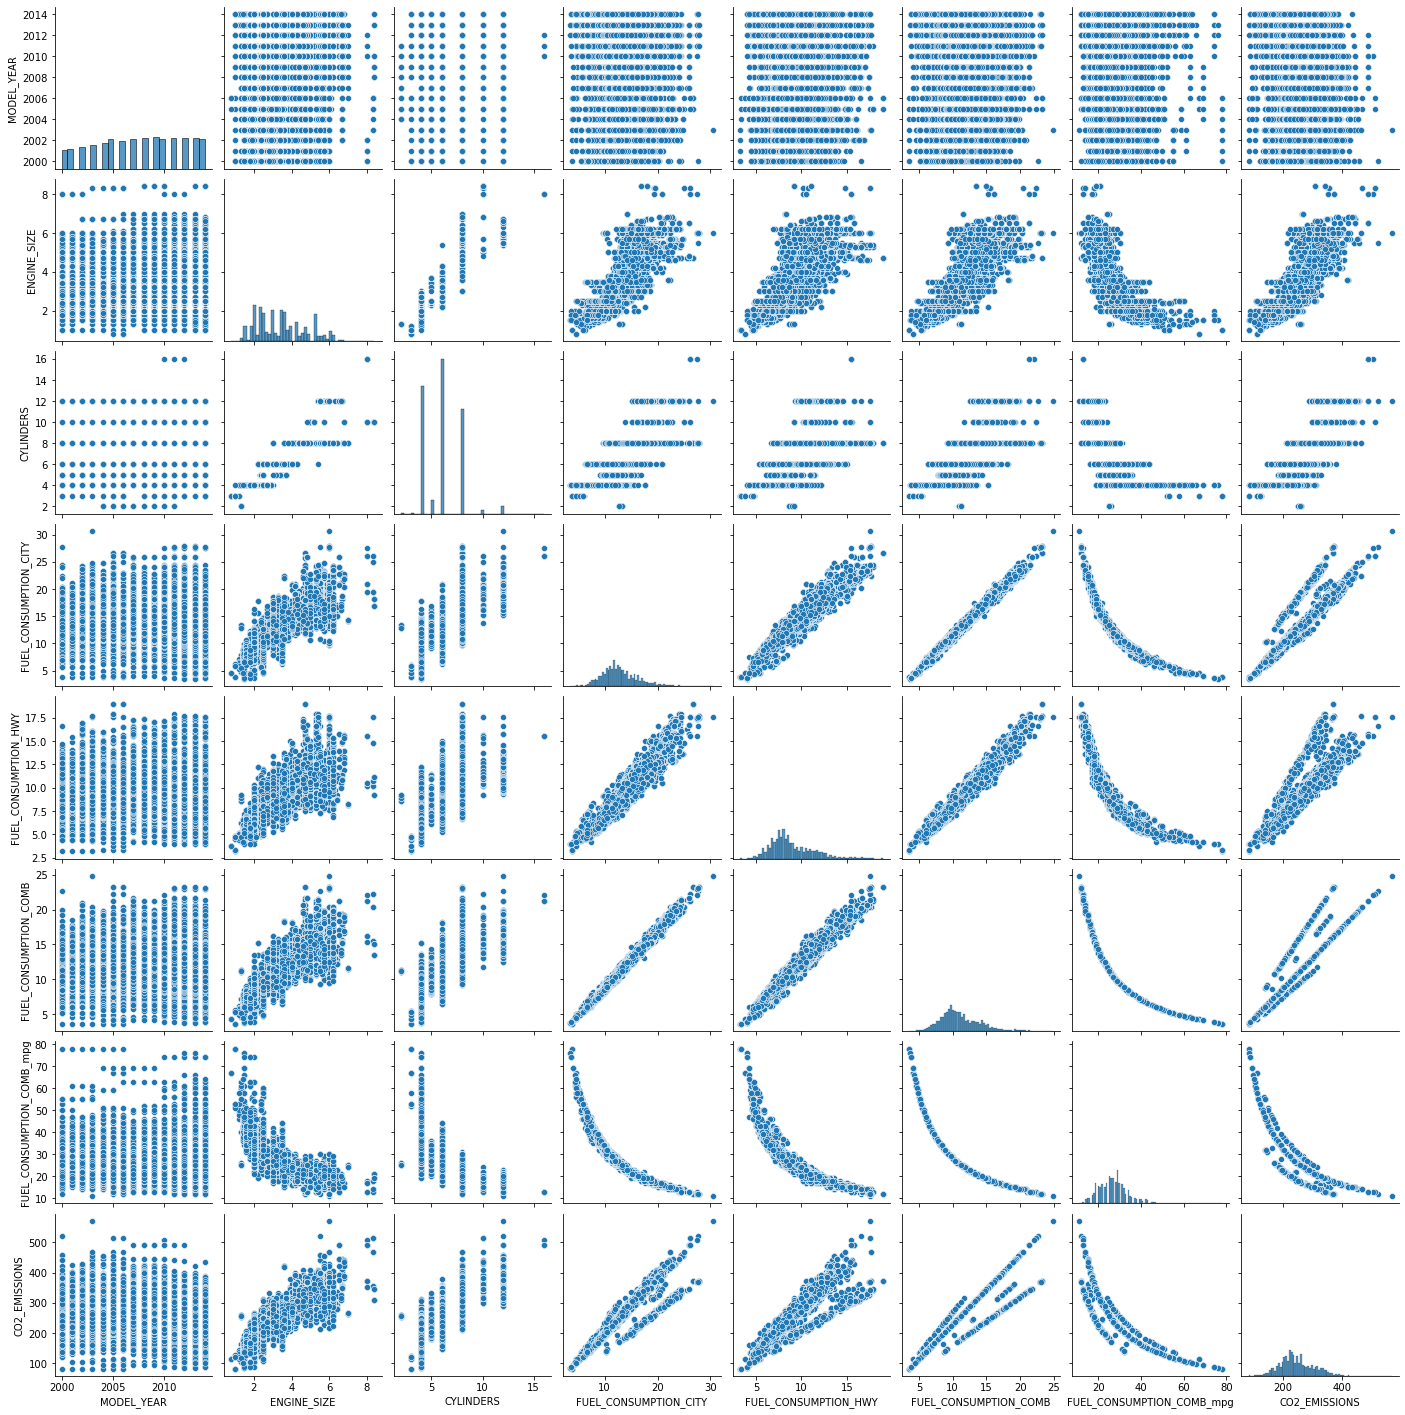

In [7]:
sns.pairplot(data=df)



- **CO2 emissions and Fuel consumption in the city and on highways have good correlation with engine size and no. of cylinders.**
- **Engine size and no. of cylinders are also, naturally, well correlated.**


In [18]:
print('Make')
print(df['MAKE'].value_counts())
print('\n')
print('Cylinders')
print(df['CYLINDERS'].value_counts())
print('\n')
print('Vehicle Class')
print(df['VEHICLE_CLASS'].value_counts())
print('\n')
print('Fuel Type')
print(df['FUEL_TYPE'].value_counts())

Make
CHEVROLET        1464
FORD             1009
GMC               963
BMW               899
MERCEDES-BENZ     758
DODGE             675
TOYOTA            620
VOLKSWAGEN        511
NISSAN            493
PORSCHE           490
AUDI              477
MAZDA             397
VOLVO             376
SUBARU            368
CHRYSLER          343
HONDA             321
HYUNDAI           319
KIA               286
CADILLAC          260
JEEP              255
PONTIAC           253
LEXUS             249
MITSUBISHI        231
JAGUAR            212
SUZUKI            199
MINI              196
SAAB              190
INFINITI          179
ACURA             170
BUICK             167
SATURN            156
LINCOLN           126
LAND ROVER         90
FERRARI            73
BENTLEY            62
ASTON MARTIN       55
LAMBORGHINI        51
MASERATI           46
ROLLS-ROYCE        42
RAM                37
OLDSMOBILE         34
DAEWOO             34
SCION              31
HUMMER             21
FIAT               20
ISUZU

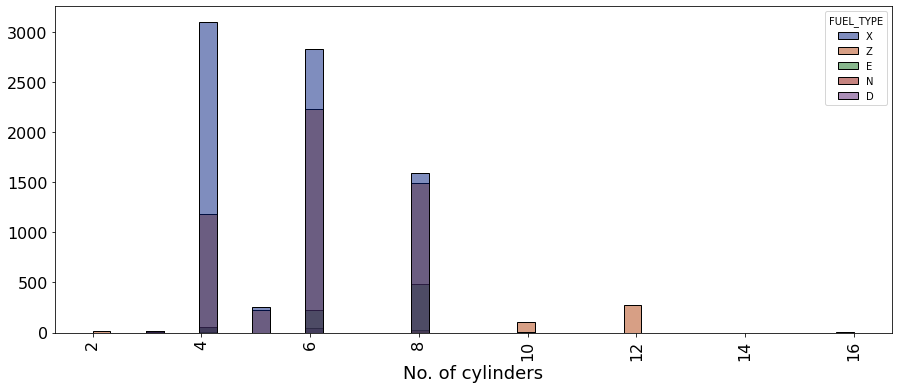

In [9]:
fig,ax=plt.subplots(figsize=(15,6))
sns.histplot(data=df,x='CYLINDERS',hue='FUEL_TYPE',palette='dark')
plt.xticks(rotation=90)
ax.tick_params(labelsize=16)
ax.set_ylabel('',fontsize=18)
ax.set_xlabel('No. of cylinders',fontsize=18)
#ax.legend(fontsize=20)
plt.show()

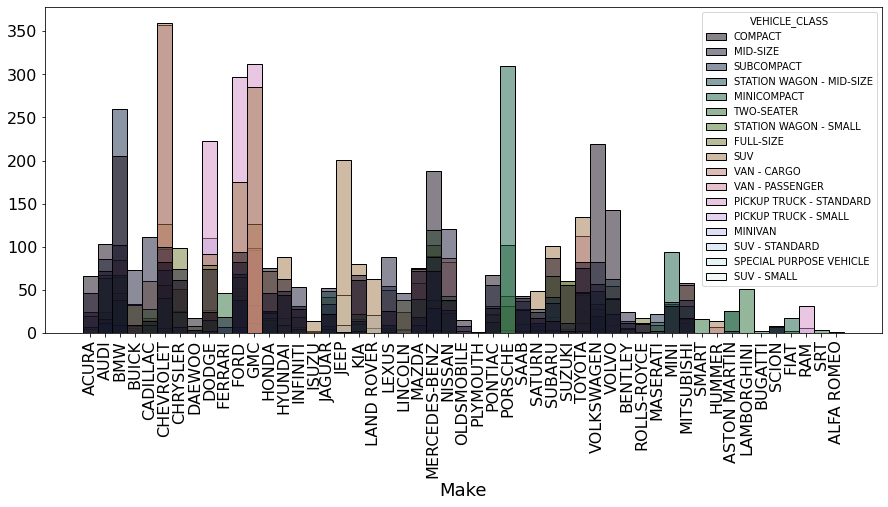

In [10]:
fig,ax=plt.subplots(figsize=(15,6))
sns.histplot(data=df,x='MAKE',hue='VEHICLE_CLASS',palette='cubehelix')
plt.xticks(rotation=90)
ax.tick_params(labelsize=16)
ax.set_ylabel('',fontsize=18)
ax.set_xlabel('Make',fontsize=18)
#ax.legend(fontsize=20)
plt.show()

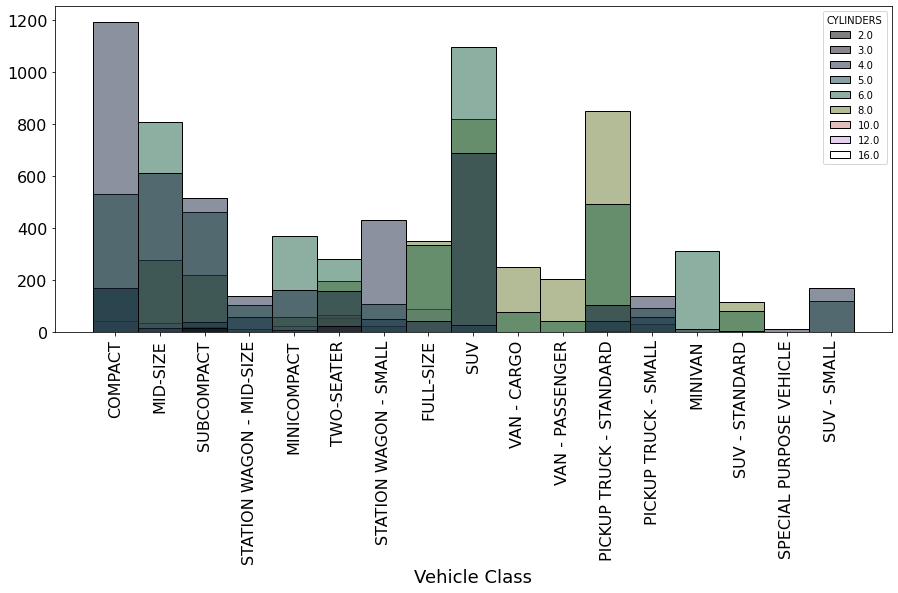

In [11]:
fig,ax=plt.subplots(figsize=(15,6))
sns.histplot(data=df,x='VEHICLE_CLASS',hue='CYLINDERS',palette='cubehelix')
plt.xticks(rotation=90)
ax.tick_params(labelsize=16)
ax.set_ylabel('',fontsize=18)
ax.set_xlabel('Vehicle Class',fontsize=18)
#ax.legend(fontsize=20)
plt.show()

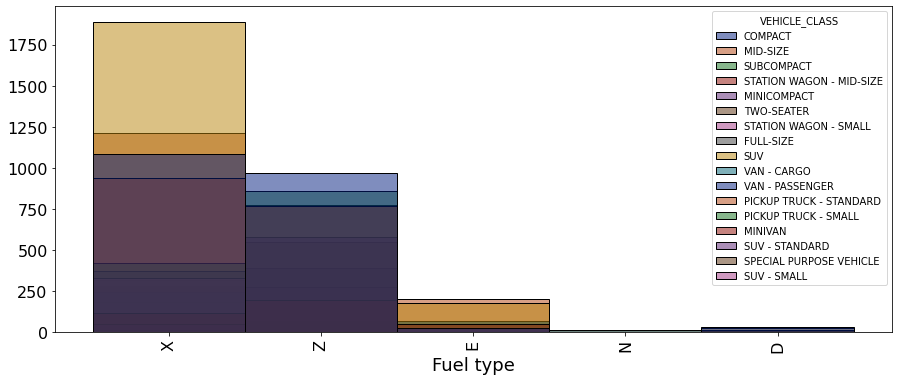

In [12]:
fig,ax=plt.subplots(figsize=(15,6))
sns.histplot(data=df,x='FUEL_TYPE',hue='VEHICLE_CLASS',palette='dark')
plt.xticks(rotation=90)
ax.tick_params(labelsize=16)
ax.set_ylabel('',fontsize=18)
ax.set_xlabel('Fuel type',fontsize=18)
#ax.legend(fontsize=20)
plt.show()

<AxesSubplot:xlabel='CO2_EMISSIONS', ylabel='FUEL_CONSUMPTION_HWY'>

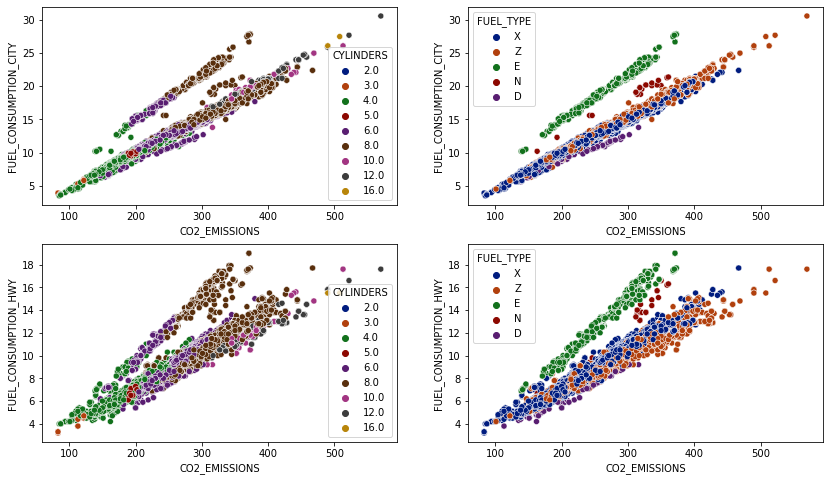

In [13]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(14,8))
sns.scatterplot(ax=ax[0,0],data=df,x='CO2_EMISSIONS',y='FUEL_CONSUMPTION_CITY',hue='CYLINDERS',palette='dark')
sns.scatterplot(ax=ax[0,1],data=df,x='CO2_EMISSIONS',y='FUEL_CONSUMPTION_CITY',hue='FUEL_TYPE',palette='dark')
sns.scatterplot(ax=ax[1,0],data=df,x='CO2_EMISSIONS',y='FUEL_CONSUMPTION_HWY',hue='CYLINDERS',palette='dark')
sns.scatterplot(ax=ax[1,1],data=df,x='CO2_EMISSIONS',y='FUEL_CONSUMPTION_HWY',hue='FUEL_TYPE',palette='dark')

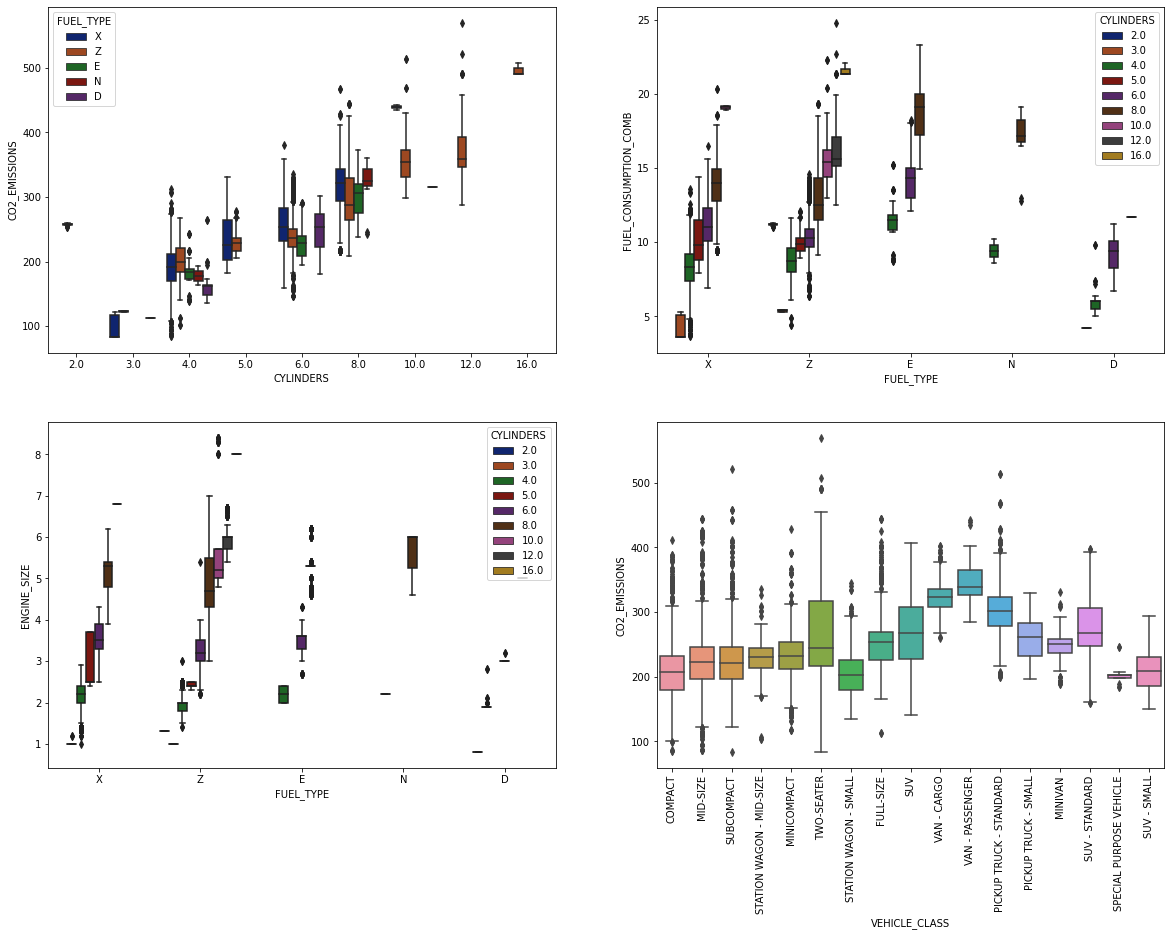

In [28]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,14))
sns.boxplot(ax=ax[0,0],data=df,x='CYLINDERS',y='CO2_EMISSIONS',hue='FUEL_TYPE',palette='dark')
sns.boxplot(ax=ax[0,1],data=df,x='FUEL_TYPE',y='FUEL_CONSUMPTION_COMB',hue='CYLINDERS',palette='dark')
sns.boxplot(ax=ax[1,0],data=df,x='FUEL_TYPE',y='ENGINE_SIZE',hue='CYLINDERS',palette='dark')
sns.boxplot(ax=ax[1,1],data=df,x='VEHICLE_CLASS',y='CO2_EMISSIONS');plt.xticks(rotation=90);


plt.show()

<AxesSubplot:xlabel='CO2_EMISSIONS', ylabel='ENGINE_SIZE'>

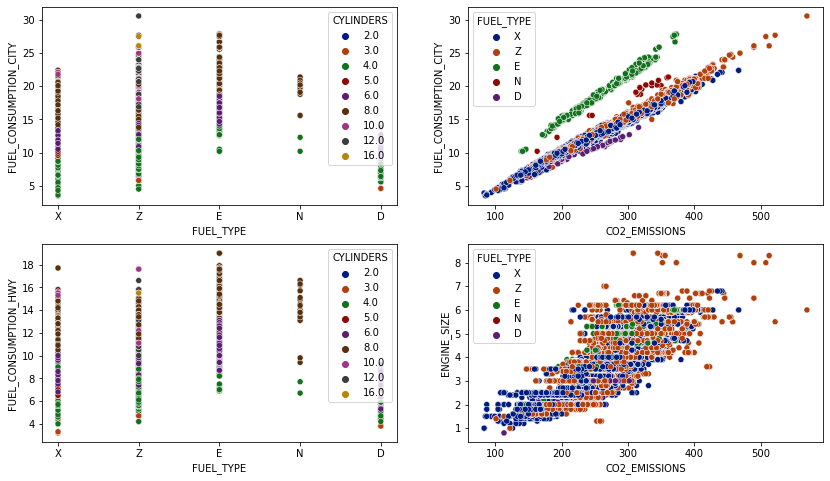

In [16]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(14,8))
sns.scatterplot(ax=ax[0,0],data=df,x='FUEL_TYPE',y='FUEL_CONSUMPTION_CITY',hue='CYLINDERS',palette='dark')
sns.scatterplot(ax=ax[0,1],data=df,x='CO2_EMISSIONS',y='FUEL_CONSUMPTION_CITY',hue='FUEL_TYPE',palette='dark')
sns.scatterplot(ax=ax[1,0],data=df,x='FUEL_TYPE',y='FUEL_CONSUMPTION_HWY',hue='CYLINDERS',palette='dark')
sns.scatterplot(ax=ax[1,1],data=df,x='CO2_EMISSIONS',y='ENGINE_SIZE',hue='FUEL_TYPE',palette='dark')